In [1]:
"""
This code belongs to the paper:
-- Y.C. Mathpati, K.S. More, T. Tripura, R. Nayek, S. Chakraborty (2023)
   MAntRA: A framework for model agnostic reliability analysis
   
-- This code is for SDOF Duffing oscillator Drift.
"""

'\nThis code belongs to the paper:\n-- YC Mathpati, KS More, T Tripura, R Nayek, S Chakraborty (2023)\n   MAntRA: A framework for model agnostic reliability analysis\n   \n-- This code is for SDOF Duffing oscillator.\n'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42) 

In [2]:
import numpy as np

"""
The Dictionary creation part:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
"""
def library(xt, polyn, harmonic):
    if polyn == 0:
        polyn = 1
    
    # The polynomial is (x1 + x2)^p, with p is the order
    # poly order 0
    ind = 0
    n = len(xt[0])
    D = np.ones([n,1])
    
    if polyn >= 1:
        # poly order 1
        for i in range(len(xt)):
            ind = ind+1
            new = np.vstack(xt[i,:])
            D = np.append(D, new, axis=1)
     
    if polyn >= 2: 
        # ploy order 2
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                ind = ind+1
                new = np.multiply(xt[i,:], xt[j,:])
                new = np.vstack(new)
                D = np.append(D, new, axis=1) 
    
    if polyn >= 3:    
        # ploy order 3
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    ind = ind+1
                    new = np.multiply(np.multiply(xt[i,:], xt[j,:]), xt[k,:])
                    new = np.vstack(new)
                    D = np.append(D, new, axis=1) 
    
    if polyn >= 4:
        # ploy order 4
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    for l in range(k,len(xt)):
                        ind = ind+1
                        new = np.multiply(np.multiply(xt[i,:], xt[j,:]), xt[k,:])
                        new = np.multiply(new, xt[l,:])
                        new = np.vstack(new)
                        D = np.append(D, new, axis=1) 
    
    if polyn >= 5:
        # ploy order 5
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    for l in  range(k,len(xt)):
                        for m in  range(l,len(xt)):
                            ind = ind+1
                            new = np.multiply(xt[i,:], xt[j,:])
                            new = np.multiply(new, xt[k,:])
                            new = np.multiply(new, xt[l,:])
                            new = np.multiply(new, xt[m,:])
                            new = np.vstack(new)
                            D = np.append(D, new, axis=1) 
    
    if polyn >= 6:
        # ploy order 6
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    for l in  range(k,len(xt)):
                        for m in  range(l,len(xt)):
                            for n in  range(m,len(xt)):
                                ind = ind+1
                                new = np.multiply(xt[i,:], xt[j,:])
                                new = np.multiply(new, xt[k,:])
                                new = np.multiply(new, xt[l,:])
                                new = np.multiply(new, xt[m,:])
                                new = np.multiply(new, xt[n,:])
                                new = np.vstack(new)
                                D = np.append(D, new, axis=1) 
    
    
    # for the modulus operator
    for i in range(len(xt)):
        ind = ind+1
        new = np.vstack(abs(xt[i,:]))
        D = np.append(D, new, axis=1)
      
    # for the tensor operator
    for i in range(len(xt)):
        for j in  range(len(xt)):
            ind = ind+1
            new = np.multiply(xt[i,:],abs(xt[j,:]))
            new = np.vstack(new)
            D = np.append(D, new, axis=1)
            
    if harmonic == 1:
        # for sin(x)
        for i in range(len(xt)):
            ind = ind+1
            new = np.vstack(np.sin(xt[i,:]))
            D = np.append(D, new, axis=1)
            #  or,
            # ind = ind+1
            # new = np.sin(xt[i,:])
            # D = np.insert(D, ind, new, axis=1)
            
        # for cos(x)
        for i in range(len(xt)):
            ind = ind+1
            new = np.vstack(np.cos(xt[i,:]))
            D = np.append(D, new, axis=1)
    
 
    ind = len(D[0])
    
    return D, ind

In [3]:

import numpy as np

"""
A Duffing Van der pol system excited by random noise
----------------------------------------------------------------------
"""
def duffing(x1, x2, T):

    # parameters of Duffing oscillator in Equation
    m = 1
    c = 2
    k = 1000
    k3 = 100000
    sigma = 1
    
    dt = 0.001
    t = np.arange(0, T+dt, dt)
    Nsamp = 200 # no. of samples in the run
    delmat = np.row_stack(([np.sqrt(dt), 0],[(dt**1.5)/2, (dt**1.5)/(2*np.sqrt(3))]))
    
    y1 = []
    y2 = []
    xz = []
    xzs = []
    # Simulation Starts Here ::
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = np.array([x1, x2])
        x = np.vstack(x0)  # Zero initial condition.
        for n in range(len(t)-1):

            delgen = np.dot(delmat, np.random.normal(0,1,2))
            dW = delgen[0]
            dZ = delgen[1]
            a1 = x0[1]
            a2 = -(c/m)*x0[1]-(k/m)*x0[0]-(k3/m)*(x0[0]**3)
            b2 = (sigma/m) * x0[0]

            sol1 = x0[0] + a1*dt 
            sol2 = x0[1] + a2*dt + b2*dW 
            x0 = np.array([sol1, sol2])
            x = np.column_stack((x, x0))
        y1.append(x[0,:])
        y2.append(x[1,:])
        
        zint = x[1,0:-1]
        xfinal = x[1,1:] 
        xmz = (xfinal - zint) # 'x(t)-z' vector
        xmz2 = np.multiply(xmz, xmz)
        xz.append(xmz)
        xzs.append(xmz2)
        
    xz = pow(dt,-1)*np.mean(np.array(xz), axis = 0)
    xzs = pow(dt,-1)*np.mean(np.array(xzs), axis = 0)
    
    y1 = np.array(y1)
    y2 = np.array(y2)
    time = t[0:-1]
    
    return xz, xzs, y1, y2, time

In [4]:
T = 1

# Response generation:
x1, x2 = 0.125, 0 # initial displacement for duffing
xdt, xdts, y1, y2, t_eval = duffing(x1, x2, T)

Text(0.5, 1.0, 'Velocity')

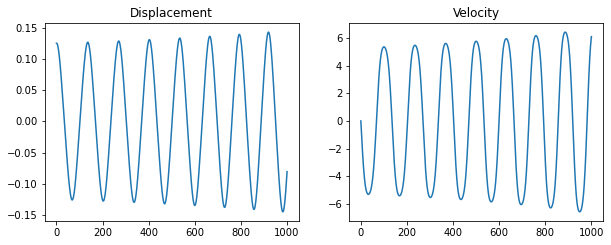

In [5]:
fig = plt.figure(figsize=(10,8))
plt.subplot(2,2,1); plt.plot(np.mean(y1, axis=0))
plt.title('Displacement')
plt.subplot(2,2,2); plt.plot(np.mean(y2, axis=0))
plt.title('Velocity')

Text(0.5, 1.0, 'Velocity')

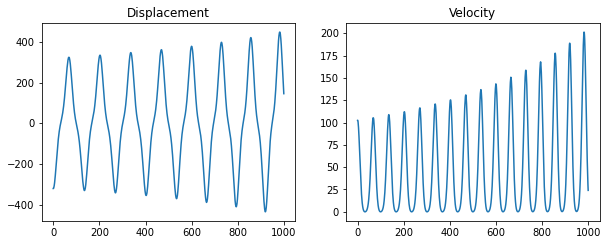

In [6]:
fig = plt.figure(figsize=(10,8))
plt.subplot(2,2,1); plt.plot(xdt)
plt.title('Displacement')
plt.subplot(2,2,2); plt.plot(xdts)
plt.title('Velocity')

In [7]:
y1.shape, y2.shape

((200, 1001), (200, 1001))

In [8]:
# Expected Dictionary Creation:
libr = []
for j in range(len(y1)):
    data = np.row_stack((y1[j,0:-1], y2[j,0:-1]))
    Dtemp, nl = library(data, 4, 0)
    libr.append(Dtemp)
libr = np.array(libr)
Dictionary = np.mean(libr, axis = 0)

In [9]:
import pandas as pd
LLL = pd.DataFrame(Dictionary)
# LLL.corr()

In [10]:
D = Dictionary
xdts = xdt

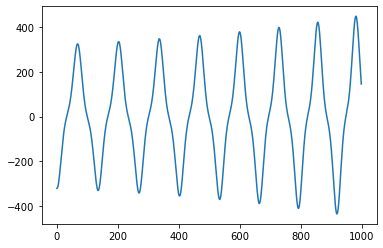

In [11]:
plt.plot(xdts)

In [12]:
print(xdts.shape)
print(D.shape)

(1000,)
(1000, 21)


In [13]:
Dict = D.reshape(-1,order='F')
Dict.shape

(21000,)

In [14]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[2.0],[3.0],[7.0],[8.0],[11.0],[19.0]]), 'Value': matlab.double([[-1000.5658788936705],[-2.001740160040777],[-99967.59815910431],[-0.06770312232218226],[9.587636145646005],[0.07215612483418313]])}


In [15]:
DMOut['Value']

matlab.double([[-1000.5658788936705],[-2.001740160040777],[-99967.59815910431],[-0.06770312232218226],[9.587636145646005],[0.07215612483418313]])

In [16]:
np.array(DMOut['Value'])

array([[-1.00056588e+03],
       [-2.00174016e+00],
       [-9.99675982e+04],
       [-6.77031223e-02],
       [ 9.58763615e+00],
       [ 7.21561248e-02]])

In [17]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
d

[-1000.5658788936705,
 -2.001740160040777,
 -99967.59815910431,
 -0.06770312232218226,
 9.587636145646005,
 0.07215612483418313]

In [18]:
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
b

[1, 2, 6, 7, 10, 18]

In [19]:
initz0_1 = np.zeros(D.shape[1])
for i in b:
    initz0_1[i] = 1
    
initz0_1

array([0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0.])

In [20]:
import warnings
import math
import numpy as np
import scipy as sp
import sympy as smp
from scipy import stats
from numpy import linalg as la
import matplotlib.pyplot as plt
from numpy.random import gamma
from scipy.special import loggamma

def Variational_Bayes_Code(X, y, initz0, tol, verbosity):

    if (len(X) == 0 or len(y) == 0):
        raise Exception('X and or y is missing')
        
    if (len(X) != len(y)):
        raise Exception('Number of observations do not match')
        
    X = stats.zscore(X, ddof = 1)         
    X = np.c_[np.ones(len(X)),X]          
    y = y - np.mean(y)
    N = len(X)
    # Prior parameters of noise variance (Inverse Gamma dist)
    A = 1e-4
    B = 1e-4
    vs = 10
    tau0 = 1000
    
    if (len(initz0) == 0):
        raise Exception('No initial value of z found')
    else:
        p0 = expit(-0.5*(np.sqrt(N)))       
        
        # Adding the intercept indicator variable (slightly less than 1 to prevent log(0) values) 
        initz = np.hstack((1,initz0))   

        DS,LLcvg  = run_VB2(X, y, vs, A, B, tau0, p0, initz, tol, verbosity)    
        # This is function which will come first
        
    out_vb   = DS
    a = DS['zmean'] > 0.5
    count = 0
    modelIdx = []
    for i in a:
        if i == True:
            modelIdx.append(count)
        count += 1
            
    modelIdx = np.setdiff1d(modelIdx,0)
    out_vb['modelIdx'] = modelIdx-1
    out_vb['Zmed'] = DS['zmean'][modelIdx]
    out_vb['Wsel'] = DS['wmean'][modelIdx]
    out_vb['Wcov'] = DS['wCOV'][modelIdx, modelIdx]
    out_vb['sig2'] = DS['sig2']
    
    return out_vb

DS = {}
def run_VB2(Xc, yc, vs, A, B, tau0, p0, initz, tol, verbosity):
    """This function is the implementation of VB from John T. Ormerod paper (2014)
       This implementation uses slab scaling by noise variance
       vs    : treated as a constant
       A,B   : constants of the IG prior over noise variance
       tau0  : Expected value of (sigma^{-2})
       p0    : inclusion probablility
       initz : Initial value of z
       Xc    : Centered and standardized dictionary except the first column
       yc    : Centered observations """
    
    Lambda    = logit(p0)
    iter_     = 0
    max_iter  = 100
    LL        = np.zeros(max_iter)        
    zm        = np.reshape(initz,(-1))            
    taum      = tau0                      
    invVs     = 1/vs
    
    X = Xc
    y = yc
    XtX = (X.T) @ X
    XtX = 0.5*(XtX + (XtX).T)
    Xty = (X.T) @ y                 
    yty = (y.T) @ y

    eyep = np.eye(len(XtX))
    [N,p] = X.shape
    allidx = np.arange(p)
    zm[0] = 1                                                                   # Always include the intercept 
    Abar    = (A + 0.5*N + 0.5*p)
    converged = 0
    
    while (converged==0):
        if (iter_==100):
            break
        
        Zm       = np.diag(zm)
        Omg      = (np.reshape(zm,(-1,1)) @ np.reshape(zm,(1,-1))) + (Zm @ (eyep-Zm))
        # Update the mean and covariance of the coefficients given mean of z
        term1    = XtX * Omg                                                       # elementwisw multiplication
        invSigma = taum * (term1 + invVs * eyep)
        invSigma = 0.5*(invSigma + invSigma.T)                                     # symmetric
        Sigma    = la.inv(invSigma) @ eyep
        mu       = taum * (Sigma @ Zm @ Xty)                                       # @ ---> matrix multiplication
        
        # Update tau related to sigma
        term2    = 2 * Xty @ Zm @ mu
        term3    =  np.reshape(mu,(len(initz0)+1,1)) @ np.reshape(mu,(1,len(initz0)+1))+ Sigma
        term4    = yty - term2 + np.trace((term1 + invVs * eyep) @ term3)    
        s        = B + 0.5*term4
        
        if s<0:
            warnings.warn('s turned out be less than 0. Taking absolute value')
            s = B + 0.5*abs(term4)
        
        taum     = Abar / s
        zstr   = zm

        order   = np.setdiff1d(np.random.permutation(p), 0, assume_unique=True)
        for j in order: 
            muj     = mu[j]                            
            sigmaj  = Sigma[j,j]
            
            remidx  = np.setdiff1d(allidx,j)
            mu_j    = mu[remidx]
            Sigma_jj= Sigma[remidx,j]
            etaj    = (Lambda - 0.5 * taum * ((muj**2 + sigmaj) * XtX[j,j]) 
                       + taum * np.reshape(X[:,j],(1,-1)) @ (np.reshape(y,(-1,1))*muj 
                        -X[:,remidx] @ np.diag(zstr[remidx]) @ ((mu_j * muj + Sigma_jj).reshape(-1,1))))
            zstr[j] = expit(etaj)
            
        zm = zstr
        
        # Calculate marginal log-likelihood
        
        LL[iter_] = ( 0.5*p 
                    - 0.5*N*np.log(2*np.pi) 
                    + 0.5*p*np.log(invVs) 
                    + A*np.log(B)
                    - loggamma(A)
                    + loggamma(Abar) 
                    - Abar*np.log(s)
                    + 0.5*np.log(la.det(Sigma))
                    + np.nansum(zm*(np.log(p0) - np.log(zm))) 
                    + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
        
        if(verbosity):
            print(f'Iteration = {iter_}  log(Likelihood) = {LL[iter_]}')
        
        if(iter_>1):
            cvg = LL[iter_] - LL[iter_-1]
            
            if (cvg < 0 and verbosity):
                print('OOPS!  log(like) decreasing!!')
            elif (cvg<tol or iter_> max_iter):
                converged = 1
                LL = LL[0:iter_]
                
        iter_    = iter_ + 1
    DS['zmean'] = zm
    DS['wmean'] = mu
    DS['wCOV'] = Sigma
    DS['sig2'] = 1/taum
    LLcvg    = LL[-1]
    return DS, LLcvg
    
def logit(C):
    logitC = np.log(C) - np.log(1-C)
    return logitC

def expit(C):
    expitC = 1./(1 + np.exp(-C))
    return expitC

In [21]:
D_std = np.std(D[:,1:],axis = 0)

In [22]:
D_std

array([9.27440902e-02, 4.42720690e+00, 6.37123936e-03, 3.06647023e-01,
       1.23452171e+01, 1.31926613e-03, 2.97726498e-02, 1.38325241e+00,
       1.28461038e+02, 1.20210424e-04, 3.21323095e-03, 7.25759478e-02,
       6.85080681e+00, 4.84090659e+02, 4.13785844e-02, 1.74251346e+00,
       1.07345777e-02, 3.07391855e-01, 3.06961413e-01, 2.32682140e+01])

In [23]:
D_std = D_std.reshape(1,-1)

In [24]:
a = np.diag(1/D_std)

In [25]:
D1 = D*np.diag(1/D_std)

In [26]:
X = D1[:,1:]
y = xdts
initz0 = initz0_1[1:]
tol = 0.0001
verbosity = True


DS = Variational_Bayes_Code(X, y, initz0, tol, verbosity)
print(DS)

Iteration = 0  log(Likelihood) = -2083.5165740236803
Iteration = 1  log(Likelihood) = -1999.3176492316463
Iteration = 2  log(Likelihood) = -1999.3119826448153
Iteration = 3  log(Likelihood) = -1999.3119817201868
{'zmean': array([1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.]), 'wmean': array([-6.15782562e-15, -9.28257811e+01, -8.86713225e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -1.31937590e+02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00]), 'wCOV': array([[ 2.65566740e-03,  1.85526191e-18,  1.03925617e-19,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -1.98272658e-18,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,

C:\Users\hp\AppData\Local\Temp\ipykernel_2100\3433819908.py:145: RuntimeWarning: divide by zero encountered in log
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\hp\AppData\Local\Temp\ipykernel_2100\3433819908.py:145: RuntimeWarning: invalid value encountered in multiply
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\hp\AppData\Local\Temp\ipykernel_2100\3433819908.py:172: RuntimeWarning: overflow encountered in exp
  expitC = 1./(1 + np.exp(-C))
C:\Users\hp\AppData\Local\Temp\ipykernel_2100\3433819908.py:144: RuntimeWarning: divide by zero encountered in log
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
C:\Users\hp\AppData\Local\Temp\ipykernel_2100\3433819908.py:144: RuntimeWarning: invalid value encountered in multiply
  + np.nansum(zm*(np.log(p0) - np.log(zm)))


<StemContainer object of 3 artists>

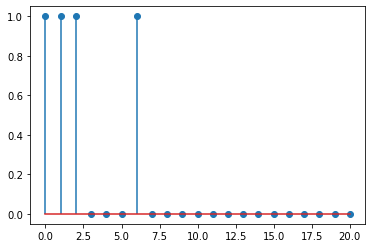

In [27]:
plt.stem(DS['zmean'])   

In [28]:
(DS["wmean"][1:]) / (D_std)

array([[-1.00088082e+03, -2.00287279e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -1.00008320e+05,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00]])

In [29]:
for i in DS["modelIdx"]:
    print((((DS["wmean"][1:]) / (D_std))).reshape(-1)[i])

-1000.8808201077443
-2.0028727921094567
-100008.320155249


In [30]:
DS["wmean"][1:] / (D_std) .reshape(-1)

array([-1.00088082e+03, -2.00287279e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -1.00008320e+05,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00])